In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))     
])

In [3]:
train_set = torchvision.datasets.CIFAR10(root='./data' , train=True, download=True, 
                                         transform=transform)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=4,
                                           shuffle=True,
                                           num_workers =2)


In [5]:
test_set = torchvision.datasets.CIFAR10(root='./data',
                                        train=False,
                                        download=True,
                                        transform=transform)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=4,
                                          shuffle=False,
                                          num_workers=2)

Files already downloaded and verified


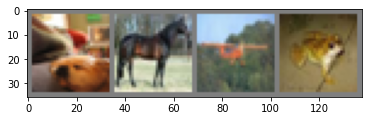


  dog horse plane  frog


In [6]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [8]:
model = CNNModel()

import torch.optim as optim

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
device

device(type='cuda', index=0)

In [11]:
model.to(device)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
for epoch in range(2):

  running_loss = 0.0

  for i, data in enumerate(train_loader,0):
    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    losses = loss(outputs, labels)
    losses.backward()

    optimizer.step()

    running_loss += losses.item()

    if i % 2000 == 1999:
      print('[%d, %5d] loss : %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

[1,  2000] loss : 1.868
[1,  4000] loss : 1.668
[1,  6000] loss : 1.585
[1,  8000] loss : 1.497
[1, 10000] loss : 1.449
[1, 12000] loss : 1.421
[2,  2000] loss : 1.352
[2,  4000] loss : 1.326
[2,  6000] loss : 1.313
[2,  8000] loss : 1.299
[2, 10000] loss : 1.289
[2, 12000] loss : 1.256


In [18]:
torch.save(model.state_dict(), './cifar10-torch.pth')